In [1]:
import pandas as pd
import numpy as np
import imblearn

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

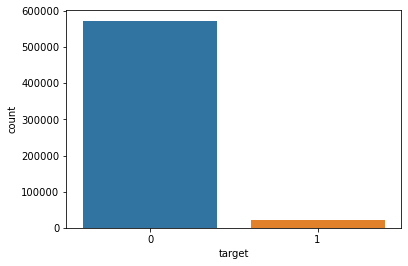

In [6]:
sns.countplot('target', data=data)

In [7]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

In [8]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from catboost import CatBoostClassifier

In [10]:
X = data.iloc[:, 2:]
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [11]:
y = data['target']

In [12]:
cat_col = [i for i in range(0, len(X.columns)) if 'cat' in X.columns[i]]
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [15]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.9635155	test: 0.9636701	best: 0.9636701 (0)	total: 69.8ms	remaining: 6.91s
10:	learn: 0.9635133	test: 0.9636701	best: 0.9636701 (0)	total: 710ms	remaining: 5.75s
20:	learn: 0.9635133	test: 0.9636701	best: 0.9636701 (0)	total: 1.34s	remaining: 5.06s
30:	learn: 0.9635222	test: 0.9636768	best: 0.9636768 (30)	total: 1.97s	remaining: 4.39s
40:	learn: 0.9635446	test: 0.9636634	best: 0.9636835 (32)	total: 2.62s	remaining: 3.77s
50:	learn: 0.9635514	test: 0.9636566	best: 0.9636835 (32)	total: 3.24s	remaining: 3.12s
60:	learn: 0.9635558	test: 0.9636566	best: 0.9636835 (32)	total: 3.89s	remaining: 2.49s
70:	learn: 0.9635626	test: 0.9636499	best: 0.9636835 (32)	total: 4.5s	remaining: 1.84s
80:	learn: 0.9635648	test: 0.9636432	best: 0.9636835 (32)	total: 5.12s	remaining: 1.2s
90:	learn: 0.9635603	test: 0.9636432	best: 0.9636835 (32)	total: 5.74s	remaining: 568ms
99:	learn: 0.9635626	test: 0.9636432	best: 0.9636835 (32)	total: 6.3s	remaining: 0us
bestTest = 0.9636835279
bestIteration = 

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[143397,      0],
       [  5404,      2]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143397
           1       1.00      0.00      0.00      5406

    accuracy                           0.96    148803
   macro avg       0.98      0.50      0.49    148803
weighted avg       0.97      0.96      0.95    148803



In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

In [22]:
np.shape(X_rus)

(43388, 57)

In [23]:
np.unique(y_rus, return_counts=True)

(array([0, 1], dtype=int64), array([21694, 21694], dtype=int64))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

In [25]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [26]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.5805906	test: 0.5839403	best: 0.5839403 (0)	total: 60.2ms	remaining: 18s
10:	learn: 0.5948496	test: 0.5914078	best: 0.5915000 (6)	total: 596ms	remaining: 15.7s
20:	learn: 0.6027780	test: 0.5987831	best: 0.5987831 (20)	total: 1.13s	remaining: 15s
30:	learn: 0.6081251	test: 0.5985987	best: 0.6001659 (24)	total: 1.66s	remaining: 14.4s
40:	learn: 0.6130727	test: 0.5997050	best: 0.6009035 (36)	total: 2.21s	remaining: 13.9s
50:	learn: 0.6158078	test: 0.6010879	best: 0.6013644 (44)	total: 2.72s	remaining: 13.3s
60:	learn: 0.6182969	test: 0.6009957	best: 0.6016410 (51)	total: 3.25s	remaining: 12.8s
70:	learn: 0.6210012	test: 0.6001659	best: 0.6016410 (51)	total: 3.78s	remaining: 12.2s
80:	learn: 0.6245352	test: 0.6001659	best: 0.6016410 (51)	total: 4.3s	remaining: 11.6s
90:	learn: 0.6275161	test: 0.6026551	best: 0.6026551 (90)	total: 4.82s	remaining: 11.1s
100:	learn: 0.6310501	test: 0.6012722	best: 0.6029317 (92)	total: 5.4s	remaining: 10.6s
110:	learn: 0.6359977	test: 0.6010879	b

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      5453
           1       0.61      0.58      0.59      5394

    accuracy                           0.60     10847
   macro avg       0.60      0.60      0.60     10847
weighted avg       0.60      0.60      0.60     10847



In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [30]:
np.shape(X_ros)

(1147036, 57)

In [31]:
np.unique(y_ros, return_counts=True)

(array([0, 1], dtype=int64), array([573518, 573518], dtype=int64))

In [32]:
del X
del y
del X_rus
del y_rus
del data
del model
del X_train
del X_test
del y_train
del y_test 

In [33]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=10, task_type='GPU')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros)

In [35]:
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.5808641	test: 0.5800446	best: 0.5800446 (0)	total: 793ms	remaining: 3m 56s
10:	learn: 0.6145474	test: 0.6141289	best: 0.6147741 (9)	total: 9.06s	remaining: 3m 58s
20:	learn: 0.6423094	test: 0.6431324	best: 0.6431324 (20)	total: 17.4s	remaining: 3m 50s
30:	learn: 0.6581159	test: 0.6606837	best: 0.6606837 (30)	total: 26.1s	remaining: 3m 46s
40:	learn: 0.6768227	test: 0.6809621	best: 0.6809621 (40)	total: 35.4s	remaining: 3m 43s
50:	learn: 0.6793289	test: 0.6831695	best: 0.6831695 (50)	total: 42.8s	remaining: 3m 28s
60:	learn: 0.6908345	test: 0.6956887	best: 0.6956887 (60)	total: 51s	remaining: 3m 19s
70:	learn: 0.6987982	test: 0.7047556	best: 0.7047556 (70)	total: 59.8s	remaining: 3m 13s
80:	learn: 0.7100260	test: 0.7174038	best: 0.7174038 (80)	total: 1m 9s	remaining: 3m 7s
90:	learn: 0.7156799	test: 0.7237750	best: 0.7237750 (90)	total: 1m 17s	remaining: 2m 59s
100:	learn: 0.7193904	test: 0.7277400	best: 0.7277400 (100)	total: 1m 26s	remaining: 2m 49s
110:	learn: 0.7262847	t

In [36]:
y_pred = model.predict(X_test)

In [37]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80    143294
           1       0.79      0.84      0.81    143465

    accuracy                           0.81    286759
   macro avg       0.81      0.81      0.81    286759
weighted avg       0.81      0.81      0.81    286759



In [38]:
# MasoudKaviani.ir